In [6]:
#import modules
import pandas #for dataframes
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #for plotting graphs

In [7]:
#loading Dataset
data=pandas.read_csv('HR_comma_sep.csv')

In [8]:
data.tail() #to display last five observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [9]:
data.head() #to display first five observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
data.info() #information of the imported data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
#As you can see above there are no missing values in the data

In [12]:
#grouping the data by taking one column as reference
#here i took the column 'Left' as reference
left = data.groupby('left')

In [19]:
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
data.describe() #for describing data interms of mean, standard deviation, min ,max and so on...

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [18]:
data.left.value_counts() #checking How many emloyees were left the company 0-present employees 1-left

0    11428
1     3571
Name: left, dtype: int64

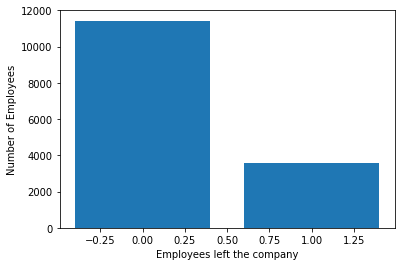

In [21]:
#Visualization of data
#checking How many emloyees were left the company by satisfaction_level
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees left the company')
plt.ylabel('Number of Employees')
plt.show()

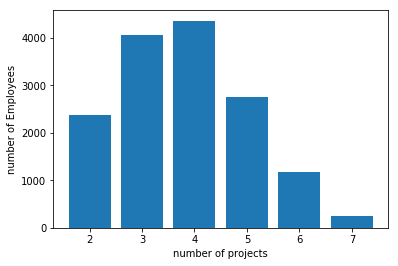

In [24]:
#checking no.of projects to satisfaction of employee
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('number of projects')
plt.ylabel('number of Employees')
plt.show()

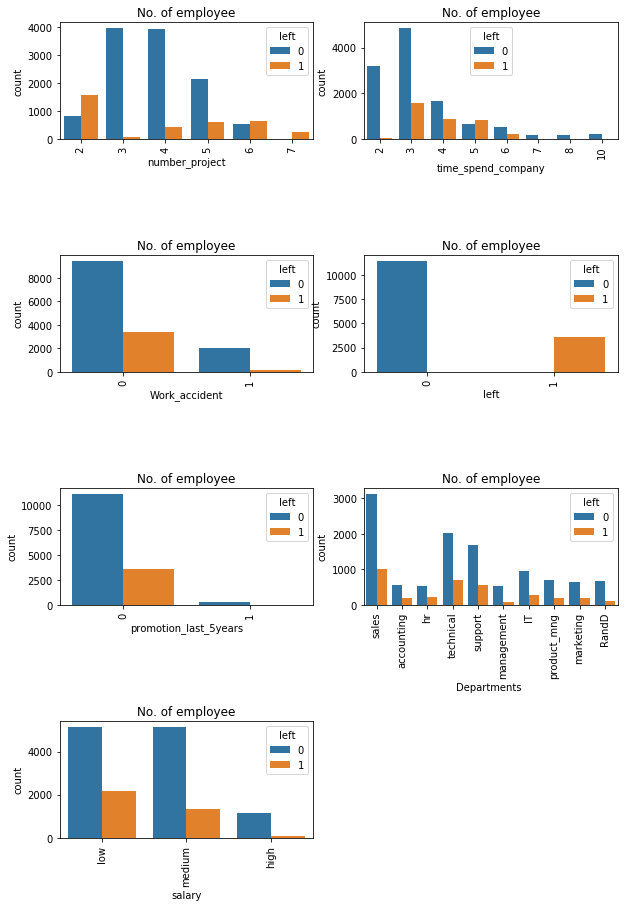

In [26]:
#Creating Subplots Using Seaborn
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [27]:
#Cluster Analysis
#import module
from sklearn.cluster import KMeans

In [29]:
# Filter data
left_emp = data[['satisfaction_level','last_evaluation']][data.left==1]

In [30]:
# Create groups using K-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

In [34]:
# Add new column "label" annd assign cluster labels
left_emp['label'] = kmeans.labels_

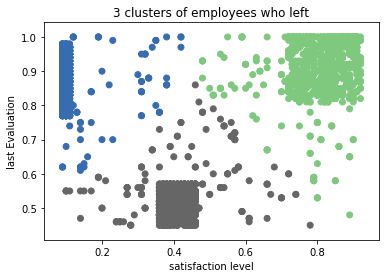

In [37]:
plt.scatter(left_emp['satisfaction_level'],left_emp['last_evaluation'],c=left_emp['label'],cmap='Accent')
plt.xlabel('satisfaction level')
plt.ylabel('last Evaluation')
plt.title('3 clusters of employees who left')
plt.show()

In [ ]:
#Building a Prediction model

In [39]:
#pre_processing of data
# Import LabelEncoder
from sklearn import preprocessing

In [41]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [45]:
#Converting string labels into numbers
data['salary']=le.fit_transform(data['salary'])
data['Departments ']= le.fit_transform(data['Departments '])

In [46]:
#Split data into Feature
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [47]:
#Split into Train and Test set
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [48]:
# Split dataset into training set and test set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [50]:
#Model Building
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [52]:
#Train the model using the training sets
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [53]:
#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [54]:
#Evaluating Model Performance
from sklearn import metrics

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9715555555555555


In [56]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.958252427184466


In [57]:
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9207089552238806
